# MidTerm Project Data 601

The source URL for the data is https://www.basketball-reference.com/leagues/NBA_2019_per_game.html

This dataset is available to the general public through the website of the https://www.basketball-reference.com. Accessing this data does not violate any laws. This specific dataset does not appear to have been previously analyzed based on a Google search.

A preliminary survey of the data indicates there are 503 rows, 29 columns, and the file is 804KB.

I studied following below:

1.	Which player scored the most Points (PTS) Per Game?
    a.	What team is the player from?
    b.	Which position is the player playing as? 
    c.	 How many games did the player played in the season?
2.	Which player scored more than 20 Points (PTS) Per Game?
3.	Which player had the highest 3-Point Field Goals Per Game (3P)?
4.	Which player had the highest Assists Per Game (AST)?
5.	Which player scored the highest (PTS) in the Los Angeles Lakers?
6.	Of the 5 positions, which position scores the most points?
7.	Performed descriptive statistics & represented in the form of Histogram using Pandas, Matplotlib & seaborn visualisation.
8.	Computed the correlation matrix & plotted Heat Map.
9.	Performed Scatter Plot



## **Web scraping data using pandas**

The following block of code will retrieve the "2018-19 NBA Player Stats: Per Game" data from http://www.basketball-reference.com/.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

# Retrieve HTML table data
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'
html = pd.read_html(url, header = 0)
df2019 = html[0]

# Data cleaning
raw = df2019.drop(df2019[df2019.Age == 'Age'].index)
raw

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


## **Acronyms**


Acronym | Description
---|---
Rk | Rank
Pos | Position
Age | Player's age on February 1 of the season
Tm | Team
G | Games
GS | Games Started
MP | Minutes Played Per Game
FG | Field Goals Per Game
FGA | Field Goal Attempts Per Game
FG% | Field Goal Percentage
3P | 3-Point Field Goals Per Game
3PA | 3-Point Field Goal Attempts Per Game
3P% | FG% on 3-Pt FGAs.
2P | 2-Point Field Goals Per Game
2PA | 2-Point Field Goal Attempts Per Game
2P% | FG% on 2-Pt FGAs.
eFG% | Effective Field Goal Percentage
| *(Note: This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.)*
FT | Free Throws Per Game
FTA | Free Throw Attempts Per Game
FT% | Free Throw Percentage
ORB | Offensive Rebounds Per Game
DRB | Defensive Rebounds Per Game
TRB | Total Rebounds Per Game
AST | Assists Per Game
STL | Steals Per Game
BLK | Blocks Per Game
TOV | Turnovers Per Game
PF | Personal Fouls Per Game
PTS | Points Per Game

### Data dimension

In [2]:
raw.shape

(708, 30)

### Dataframe contents

In [3]:
raw.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


### Check for missing values

In [4]:
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        6
3P         0
3PA        0
3P%       47
2P         0
2PA        0
2P%       15
eFG%       6
FT         0
FTA        0
FT%       43
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

### Replace missing values with 0 

In [5]:
df = raw.fillna(0)

In [6]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [7]:
df = df.drop(['Rk'], axis=1)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


### Write to CSV file

In [8]:
df.to_csv('nba2019.csv', index=False)

In [1]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!cat nba2019.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


## **Exploratory Data Analysis**

### Read data

In [11]:
df = pd.read_csv('nba2019.csv')

#### Displays the dataframe

In [12]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


If we want to see more...

In [13]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [14]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
5,Deng Adel,SF,21,CLE,19,3,10.2,0.6,1.9,0.306,...,1.000,0.2,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7
6,DeVaughn Akoon-Purcell,SG,25,DEN,7,0,3.1,0.4,1.4,0.300,...,0.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
7,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
8,Rawle Alkins,SG,21,CHI,10,1,12.0,1.3,3.9,0.333,...,0.667,1.1,1.5,2.6,1.3,0.1,0.0,0.8,0.7,3.7
9,Grayson Allen,SG,23,UTA,38,2,10.9,1.8,4.7,0.376,...,0.750,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6


Reverting back to the default

In [16]:
pd.set_option('display.max_rows', 10)

In [17]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


### Overview of data types of each columns in the dataframe

In [18]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
           ...   
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Length: 29, dtype: object

### Show specific data types in dataframe

In [19]:
df.select_dtypes(include=['number'])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,25,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,28,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,22,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,25,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,21,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,22,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,21,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,21,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [20]:
df.select_dtypes(include=['object'])

,Player,Pos,Tm
0,Álex Abrines,SG,OKC
1,Quincy Acy,PF,PHO
2,Jaylen Adams,PG,ATL
3,Steven Adams,C,OKC
4,Bam Adebayo,C,MIA
...,...,...,...
703,Tyler Zeller,C,MEM
704,Ante Žižić,C,CLE
705,Ivica Zubac,C,TOT
706,Ivica Zubac,C,LAL


## **QUESTIONS**

### **Conditional Selection**

In performing exploratory data analysis, it is important to be able to select subsets of data to perform analysis or comparisons.

**Which player scored the most Points (PTS) Per Game?**
Here, we will return the entire row.

In [21]:
df[df.PTS == df.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
267,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


We will return specific column values.

Further question, what team is the player from? 

In [22]:
PlayerMaxPoints = df[df.PTS == df.PTS.max()]
PlayerMaxPoints.Tm

267    HOU
Name: Tm, dtype: object

Which position is the player playing as?

In [23]:
PlayerMaxPoints.Pos

267    PG
Name: Pos, dtype: object

How many games did the player played in the season?

In [24]:
PlayerMaxPoints.G

267    78
Name: G, dtype: int64

**Which player scored more than 20 Points (PTS) Per Game?**

In [25]:
df[df.PTS > 20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,0.578,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
47,Bradley Beal,SG,25,WAS,82,82,36.9,9.3,19.6,0.475,...,0.808,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6
68,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,0.467,...,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
103,Jimmy Butler,SG,29,MIN,10,10,36.1,7.4,15.7,0.471,...,0.787,1.6,3.6,5.2,4.3,2.4,1.0,1.4,1.8,21.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Karl-Anthony Towns,C,23,MIN,77,77,33.1,8.8,17.1,0.518,...,0.836,3.4,9.0,12.4,3.4,0.9,1.6,3.1,3.8,24.4
662,Nikola Vučević,C,28,ORL,80,80,31.4,8.8,16.9,0.518,...,0.789,2.8,9.2,12.0,3.8,1.0,1.1,2.0,2.0,20.8
666,Kemba Walker,PG,28,CHO,82,82,34.9,8.9,20.5,0.434,...,0.844,0.6,3.8,4.4,5.9,1.2,0.4,2.6,1.6,25.6
668,John Wall,PG,28,WAS,32,32,34.5,7.7,17.3,0.444,...,0.697,0.5,3.2,3.6,8.7,1.5,0.9,3.8,2.2,20.7


**Which player had the highest 3-Point Field Goals Per Game (3P) ?**

In [26]:
df[df['3P'] == df['3P'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3


**Which player had the highest Assists Per Game (AST) ?**

In [27]:
df[df['AST'] == df['AST'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
675,Russell Westbrook,PG,30,OKC,73,73,36.0,8.6,20.2,0.428,...,0.656,1.5,9.6,11.1,10.7,1.9,0.5,4.5,3.4,22.9


### **GroupBy() function**

**Which player scored the highest (PTS) in the Los Angeles Lakers?**

In [28]:
LAL = df.groupby('Tm').get_group('LAL')

In [29]:
LAL[LAL.PTS == LAL.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
332,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,0.51,...,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4


**Of the 5 positions, which position scores the most points?**

We first group players by their positions.

In [30]:
df.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,120.0,8.785000,5.616582,0.0,4.175,7.75,12.350,27.5
C-PF,2.0,4.150000,1.202082,3.3,3.725,4.15,4.575,5.0
PF,147.0,7.703401,5.622380,0.0,3.350,6.30,11.100,27.7
PF-SF,2.0,11.200000,7.353911,6.0,8.600,11.20,13.800,16.4
PG,139.0,8.668345,6.284234,0.0,4.300,7.00,11.050,36.1
SF,120.0,8.259167,5.935203,0.0,4.200,6.70,11.600,28.0
SF-SG,2.0,15.450000,4.596194,12.2,13.825,15.45,17.075,18.7
SG,174.0,8.487356,5.724974,0.0,4.000,7.65,11.275,26.6
SG-PF,1.0,8.600000,NaN,8.6,8.600,8.60,8.600,8.6


We will now show only the 5 traditional positions (those having combo positions will be removed from the analysis).

In [31]:
positions = ['C','PF','SF','PG','SG']
POS = df[ df['Pos'].isin(positions)  ]
POS

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


Now, let's take a look at the descriptive statistics.

In [32]:
POS.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,120.0,8.785000,5.616582,0.0,4.175,7.75,12.350,27.5
PF,147.0,7.703401,5.622380,0.0,3.350,6.30,11.100,27.7
PG,139.0,8.668345,6.284234,0.0,4.300,7.00,11.050,36.1
SF,120.0,8.259167,5.935203,0.0,4.200,6.70,11.600,28.0
SG,174.0,8.487356,5.724974,0.0,4.000,7.65,11.275,26.6


### **Histograms**

We'll also try to answer this question by showing some histogram plots. So, to make it a bit easier, let's create a subset dataframe.

In [33]:
PTS = df[['Pos','PTS']]

positions = ['C','PF','SF','PG','SG']
PTS = PTS[ PTS['Pos'].isin(positions)  ]

PTS

,Pos,PTS
0,SG,5.3
1,PF,1.7
2,PG,3.2
3,C,13.9
4,C,8.9
...,...,...
703,C,11.5
704,C,7.8
705,C,8.9
706,C,8.5


#### **pandas built-in visualization**

array([[<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'PF'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'SF'}>],
       [<AxesSubplot:title={'center':'SG'}>, <AxesSubplot:>]],
      dtype=object)

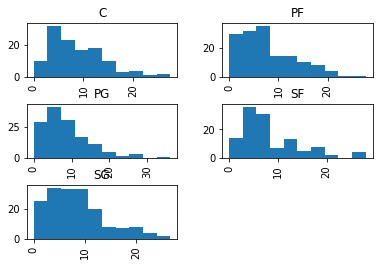

In [34]:
PTS['PTS'].hist(by=PTS['Pos'])

array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>,
       <AxesSubplot:title={'center':'PG'}>,
       <AxesSubplot:title={'center':'SF'}>,
       <AxesSubplot:title={'center':'SG'}>], dtype=object)

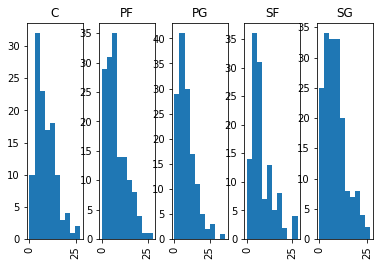

In [35]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5))

array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>,
       <AxesSubplot:title={'center':'PG'}>,
       <AxesSubplot:title={'center':'SF'}>,
       <AxesSubplot:title={'center':'SG'}>], dtype=object)

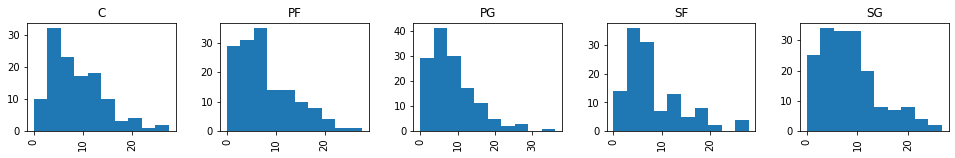

In [36]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5), figsize=(16,2))


#### **Seaborn data visualization**

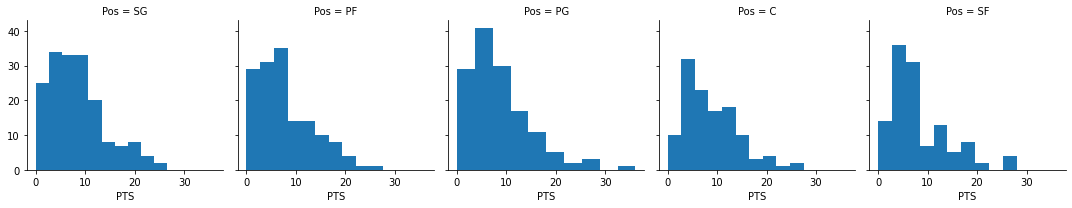

In [37]:
# Creating Multiple subplot by using Facetgrid on basis of Position Column
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(PTS, col="Pos")
g.map(plt.hist, "PTS");

### **Box plots**

#### **Box plot of points scored (PTS) grouped by Position**

##### **pandas built-in visualization**

<AxesSubplot:title={'center':'PTS'}, xlabel='Pos'>

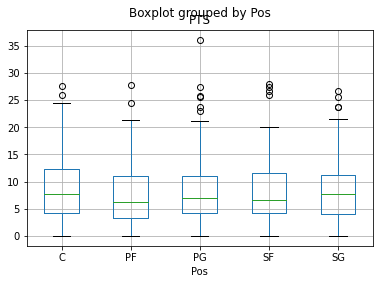

In [38]:
#Calling Box plot function 

PTS.boxplot(column='PTS', by='Pos')

##### **Seaborn data visualization**

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

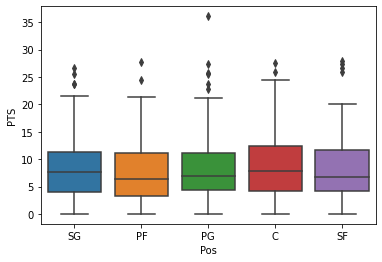

In [39]:
# Using Strip plot(individual points) & Jitter(randomise number)

import seaborn as sns

sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

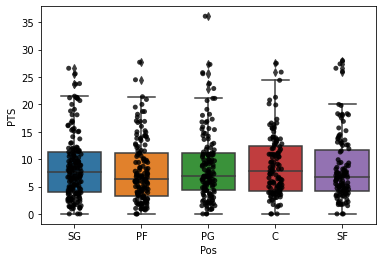

In [40]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

### **Heat map**

#### Computing correlation matrix

In [41]:
corr = df.corr()
corr

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.067822,0.040582,0.146543,0.058213,0.073779,0.036927,0.166271,0.159218,0.080328,...,0.171646,-0.016292,0.103831,0.072544,0.141556,0.080757,0.012428,0.063740,0.108226,0.081915
G,0.067822,1.000000,0.641484,0.617229,0.541442,0.521988,0.297932,0.396163,0.376494,0.190439,...,0.419104,0.288914,0.441461,0.421579,0.412688,0.404403,0.338509,0.473385,0.475785,0.534349
GS,0.040582,0.641484,1.000000,0.764661,0.724611,0.711811,0.208333,0.496450,0.485661,0.147906,...,0.267027,0.377497,0.599080,0.567642,0.563876,0.566980,0.424585,0.649941,0.537722,0.720953
MP,0.146543,0.617229,0.764661,1.000000,0.870974,0.892272,0.250899,0.686999,0.693822,0.263535,...,0.454169,0.386490,0.695738,0.642351,0.675725,0.734732,0.438661,0.766357,0.730804,0.875831
FG,0.058213,0.541442,0.724611,0.870974,1.000000,0.973355,0.351566,0.604936,0.600830,0.218206,...,0.371598,0.464378,0.723009,0.687463,0.665761,0.635615,0.460076,0.830099,0.624156,0.990014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STL,0.080757,0.404403,0.566980,0.734732,0.635615,0.659276,0.161195,0.475153,0.489862,0.147455,...,0.266785,0.257042,0.475746,0.436863,0.633394,1.000000,0.341664,0.628718,0.528054,0.637628
BLK,0.012428,0.338509,0.424585,0.438661,0.460076,0.362490,0.380163,0.025957,0.022530,-0.098000,...,0.150722,0.642033,0.661447,0.697255,0.148471,0.341664,1.000000,0.368996,0.563042,0.428259
TOV,0.063740,0.473385,0.649941,0.766357,0.830099,0.832446,0.214178,0.463594,0.486354,0.132833,...,0.302328,0.362491,0.655568,0.605408,0.820614,0.628718,0.368996,1.000000,0.602627,0.833448
PF,0.108226,0.475785,0.537722,0.730804,0.624156,0.591815,0.351862,0.353059,0.353207,0.094418,...,0.345816,0.551968,0.669048,0.673122,0.396177,0.528054,0.563042,0.602627,1.000000,0.612860


#### obtaining heat map

<AxesSubplot:>

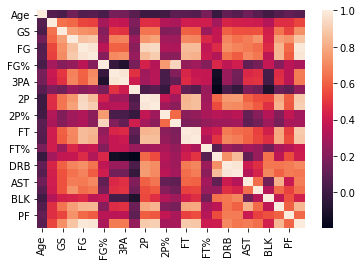

In [42]:
sns.heatmap(corr)

#### Adjust figure size of heat map

<AxesSubplot:>

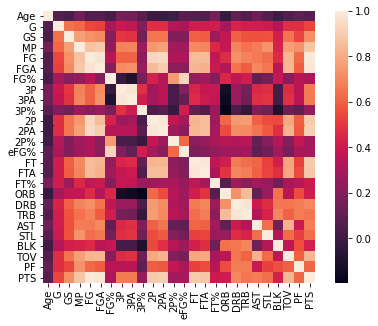

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

In [2]:
# dark color indicates that co-efficient corr is low & light color indiactes that co-efficient corr is 1
# changed shape to square

#### Mask diagonal half of heat map (Diagonal correlation matrix)

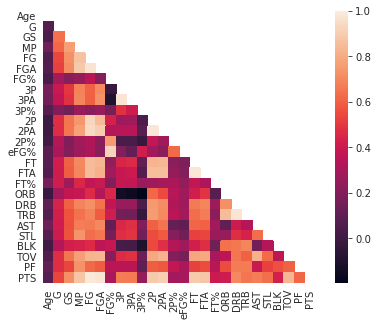

In [44]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

import numpy as np
import seaborn as sns

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

In [3]:
# As we have mirror images, masking upper half using mask variable

### **Scatter Plot**

In [45]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


#### Select columns if they have numerical data types

In [46]:
df.select_dtypes(include=['number'])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,25,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,28,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,22,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,25,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,21,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,22,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,21,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,21,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


#### Select the first 5 columns (by index number)

In [47]:
number = df.select_dtypes(include=['number'])

In [48]:
number.iloc[:,:5]

,Age,G,GS,MP,FG
0,25,31,2,19.0,1.8
1,28,10,0,12.3,0.4
2,22,34,1,12.6,1.1
3,25,80,80,33.4,6.0
4,21,82,28,23.3,3.4
...,...,...,...,...,...
703,29,4,1,20.5,4.0
704,22,59,25,18.3,3.1
705,21,59,37,17.6,3.6
706,21,33,12,15.6,3.4


#### Select 5 specific columns (by column names)

In [49]:
selections = ['Age', 'G', 'STL', 'BLK', 'AST', 'PTS']
df5 = df[selections]
df5

,Age,G,STL,BLK,AST,PTS
0,25,31,0.5,0.2,0.6,5.3
1,28,10,0.1,0.4,0.8,1.7
2,22,34,0.4,0.1,1.9,3.2
3,25,80,1.5,1.0,1.6,13.9
4,21,82,0.9,0.8,2.2,8.9
...,...,...,...,...,...,...
703,29,4,0.3,0.8,0.8,11.5
704,22,59,0.2,0.4,0.9,7.8
705,21,59,0.2,0.9,1.1,8.9
706,21,33,0.1,0.8,0.8,8.5


#### Make scatter plot grid

##### 5 columns

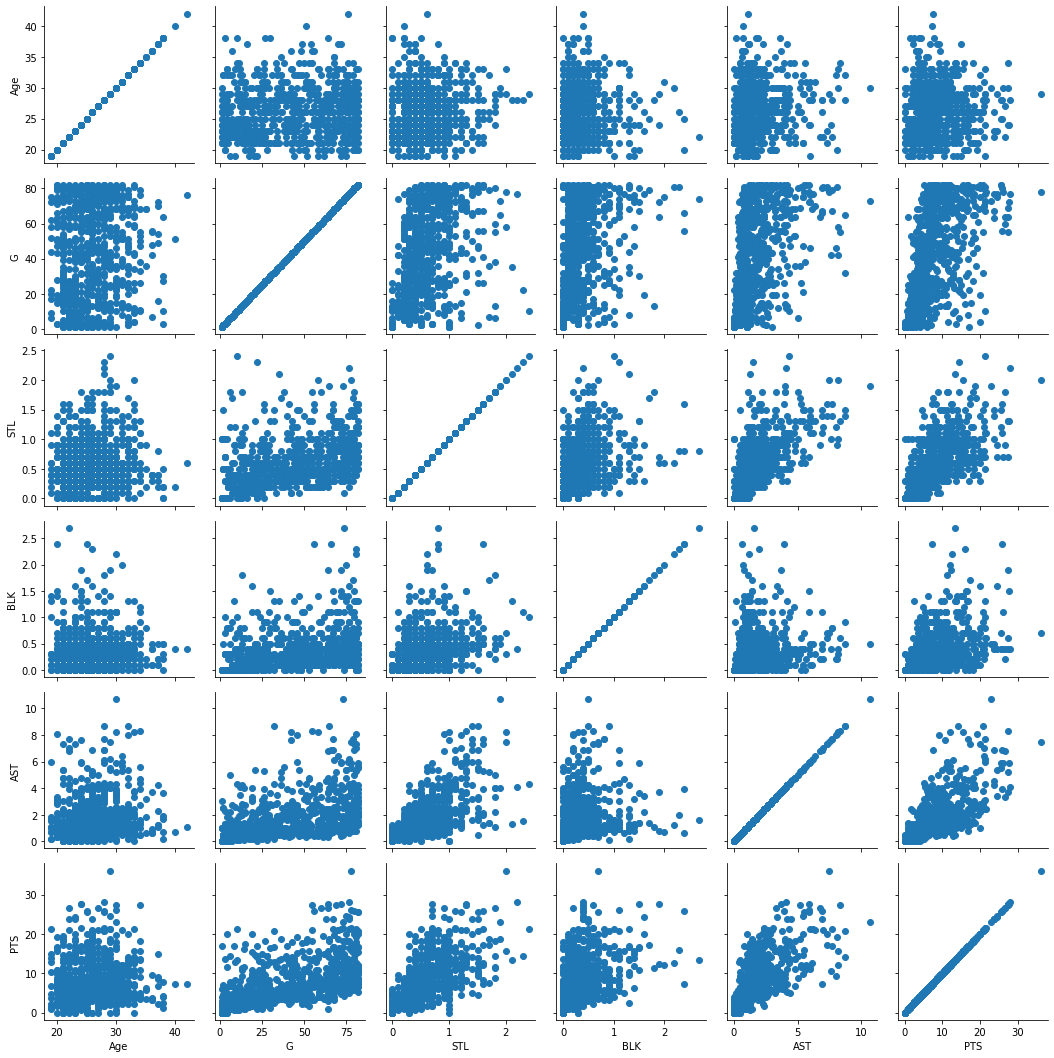

In [50]:
import seaborn as sns

g = sns.PairGrid(df5)
g.map(plt.scatter);